In [ ]:
#большой набор данных о моделях квартир, включая агрегированные результаты моделирования на основе геолокации, охватывающие обзор, естественное 
#освещение, транспортный шум, центральность и геометрический анализ.

#Атрибуты: 'building_id', 'location_rating_MIKRAT_W', 'location_rating_IMAGE_W', 'location_rating_FZ_W', 'location_rating_DL_W', 'location_rating_NASE_W_DOM', 'location_rating_FGFRQZ'.

In [11]:
import pandas as pd

# Загрузка данных
data = pd.read_csv(r'C:\Users\kettl\Downloads\swiss-dwellings-v3.0.0\swiss-dwellings-v3.0.0\location_ratings.csv')


# Список атрибутов
attributes = ['building_id', 'location_rating_MIKRAT_W', 'location_rating_IMAGE_W', 'location_rating_FZ_W', 'location_rating_DL_W', 'location_rating_NASE_W_DOM', 'location_rating_FGFRQZ']

# Вычисление среднего и СКО
for attr in attributes:
    mean_value = data[attr].mean()
    std_deviation = data[attr].std()
    print(f"Атрибут: {attr}")
    print(f"Среднее значение: {mean_value}")
    print(f"Стандартное отклонение: {std_deviation}\n")

Атрибут: building_id
Среднее значение: 3847.9143801652895
Стандартное отклонение: 4633.681952341769

Атрибут: location_rating_MIKRAT_W
Среднее значение: 3.4231380337636543
Стандартное отклонение: 0.547925845589414

Атрибут: location_rating_IMAGE_W
Среднее значение: 2.913174445547832
Стандартное отклонение: 1.1557337133818568

Атрибут: location_rating_FZ_W
Среднее значение: 3.618470705064548
Стандартное отклонение: 0.7514465816798582

Атрибут: location_rating_DL_W
Среднее значение: 3.406719629261834
Стандартное отклонение: 1.2399895309756184

Атрибут: location_rating_NASE_W_DOM
Среднее значение: 6.052931323283082
Стандартное отклонение: 3.06692753763212

Атрибут: location_rating_FGFRQZ
Среднее значение: 1.426158940397351
Стандартное отклонение: 0.9520698748556682



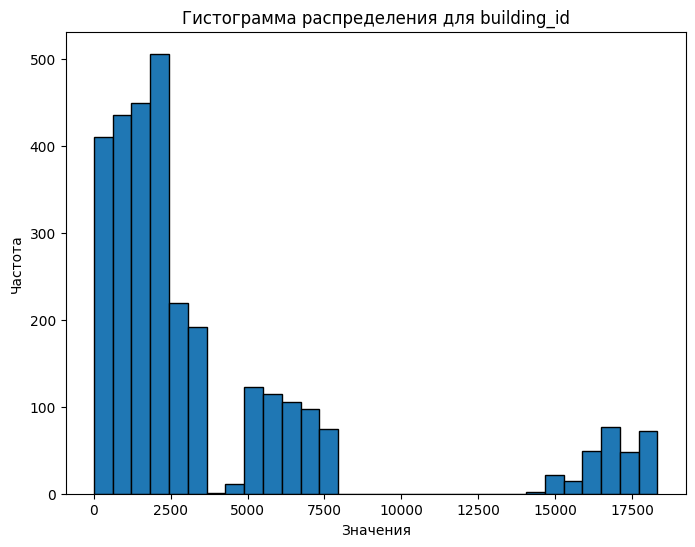

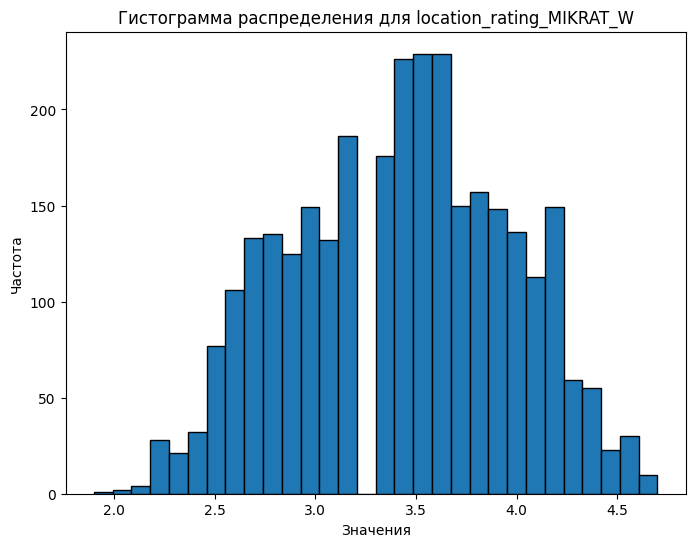

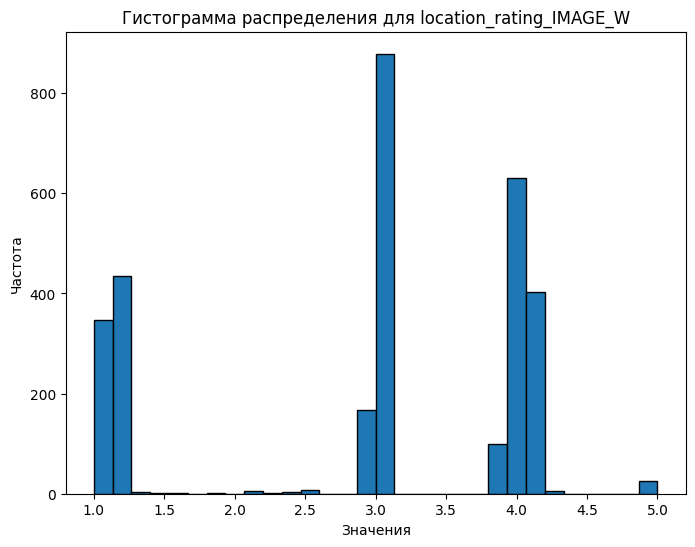

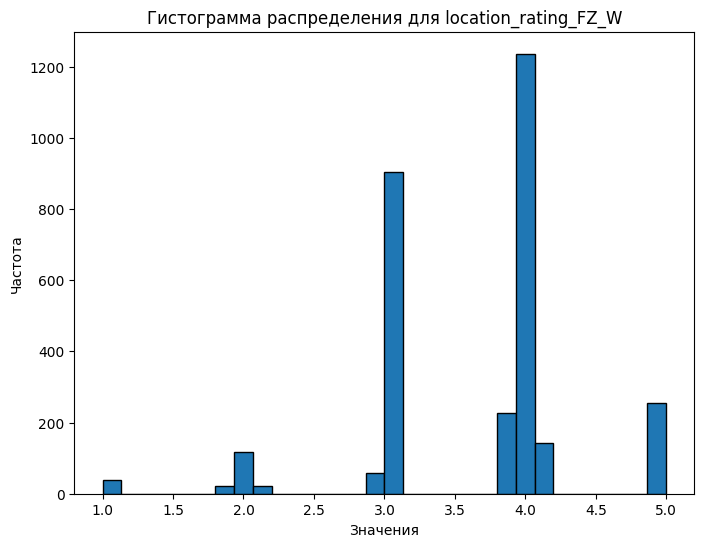

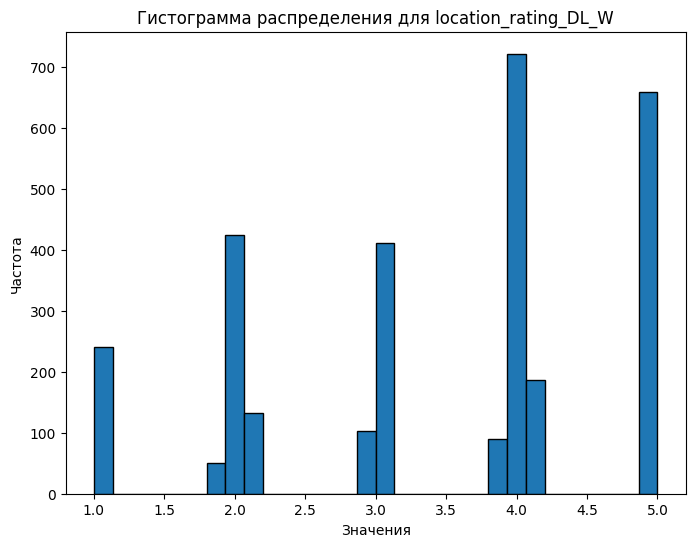

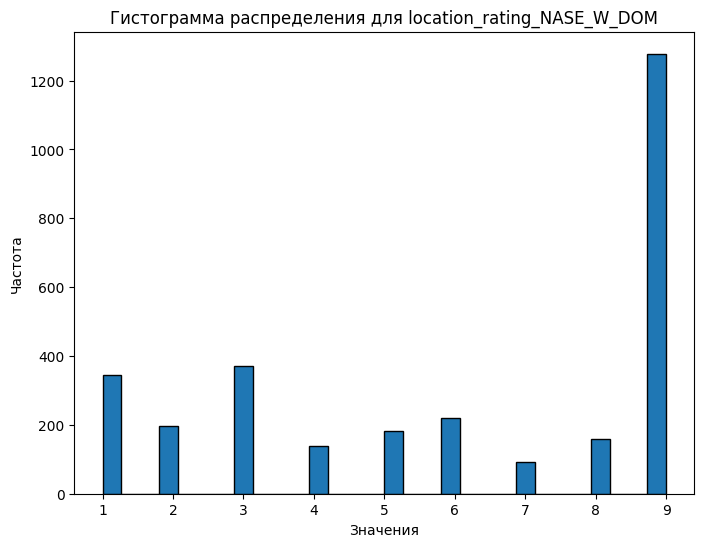

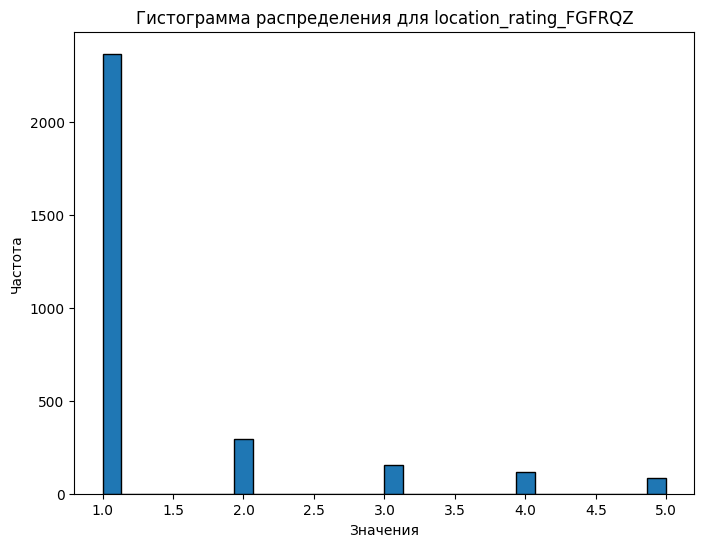

In [16]:
import matplotlib.pyplot as plt

for attr in attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(data[attr].dropna(), bins=30, edgecolor='black')
    plt.title(f"Гистограмма распределения для {attr}")
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.show()

In [17]:
for attr in attributes:
    Q1 = data[attr].quantile(0.25)
    Q3 = data[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[attr] < lower_bound) | (data[attr] > upper_bound)]
    print(f"Атрибут: {attr}")
    print(f"Количество выбросов: {outliers.shape[0]}\n")

Атрибут: building_id
Количество выбросов: 284

Атрибут: location_rating_MIKRAT_W
Количество выбросов: 0

Атрибут: location_rating_IMAGE_W
Количество выбросов: 0

Атрибут: location_rating_FZ_W
Количество выбросов: 38

Атрибут: location_rating_DL_W
Количество выбросов: 0

Атрибут: location_rating_NASE_W_DOM
Количество выбросов: 0

Атрибут: location_rating_FGFRQZ
Количество выбросов: 651



In [18]:
for attr in attributes:
    missing_count = data[attr].isna().sum()
    print(f"Атрибут: {attr}")
    print(f"Количество пропущенных значений: {missing_count}\n")

Атрибут: building_id
Количество пропущенных значений: 0

Атрибут: location_rating_MIKRAT_W
Количество пропущенных значений: 4

Атрибут: location_rating_IMAGE_W
Количество пропущенных значений: 4

Атрибут: location_rating_FZ_W
Количество пропущенных значений: 4

Атрибут: location_rating_DL_W
Количество пропущенных значений: 4

Атрибут: location_rating_NASE_W_DOM
Количество пропущенных значений: 40

Атрибут: location_rating_FGFRQZ
Количество пропущенных значений: 5



In [19]:
#пропущенных значений мало и их удаление не повлияет на общий объем данных.

data_cleaned = data.dropna(subset=attributes)


In [21]:
# Вычисление матрицы корреляции
correlation_matrix = data.corr(method='pearson')

# Вывод матрицы корреляции
print(correlation_matrix)

                            building_id  location_rating_MIKRAT_W  \
building_id                    1.000000                 -0.014504   
location_rating_MIKRAT_W      -0.014504                  1.000000   
location_rating_IMAGE_W       -0.033678                  0.763184   
location_rating_FZ_W          -0.179214                  0.176147   
location_rating_DL_W           0.098203                  0.449647   
location_rating_NASE_W_DOM     0.019359                  0.569344   
location_rating_FGFRQZ        -0.025517                  0.372623   

                            location_rating_IMAGE_W  location_rating_FZ_W  \
building_id                               -0.033678             -0.179214   
location_rating_MIKRAT_W                   0.763184              0.176147   
location_rating_IMAGE_W                    1.000000              0.047146   
location_rating_FZ_W                       0.047146              1.000000   
location_rating_DL_W                       0.209589           

In [22]:
# Поиск высококоррелированных атрибутов
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.7:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value)
            high_corr_pairs.append(pair)

# Вывод результатов
print("Высококоррелированные атрибуты:")
for pair in high_corr_pairs:
    print(f"{pair[0]} и {pair[1]}: коэффициент корреляции = {pair[2]:.2f}")

Высококоррелированные атрибуты:
location_rating_IMAGE_W и location_rating_MIKRAT_W: коэффициент корреляции = 0.76
location_rating_NASE_W_DOM и location_rating_IMAGE_W: коэффициент корреляции = 0.71


In [23]:
# Поиск атрибутов без корреляции
no_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) <= 0.1:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value)
            no_corr_pairs.append(pair)

# Вывод результатов
print("Атрибуты без корреляции:")
for pair in no_corr_pairs:
    print(f"{pair[0]} и {pair[1]}: коэффициент корреляции = {pair[2]:.2f}")

Атрибуты без корреляции:
location_rating_MIKRAT_W и building_id: коэффициент корреляции = -0.01
location_rating_IMAGE_W и building_id: коэффициент корреляции = -0.03
location_rating_FZ_W и location_rating_IMAGE_W: коэффициент корреляции = 0.05
location_rating_DL_W и building_id: коэффициент корреляции = 0.10
location_rating_NASE_W_DOM и building_id: коэффициент корреляции = 0.02
location_rating_NASE_W_DOM и location_rating_FZ_W: коэффициент корреляции = 0.03
location_rating_FGFRQZ и building_id: коэффициент корреляции = -0.03
location_rating_FGFRQZ и location_rating_FZ_W: коэффициент корреляции = 0.08


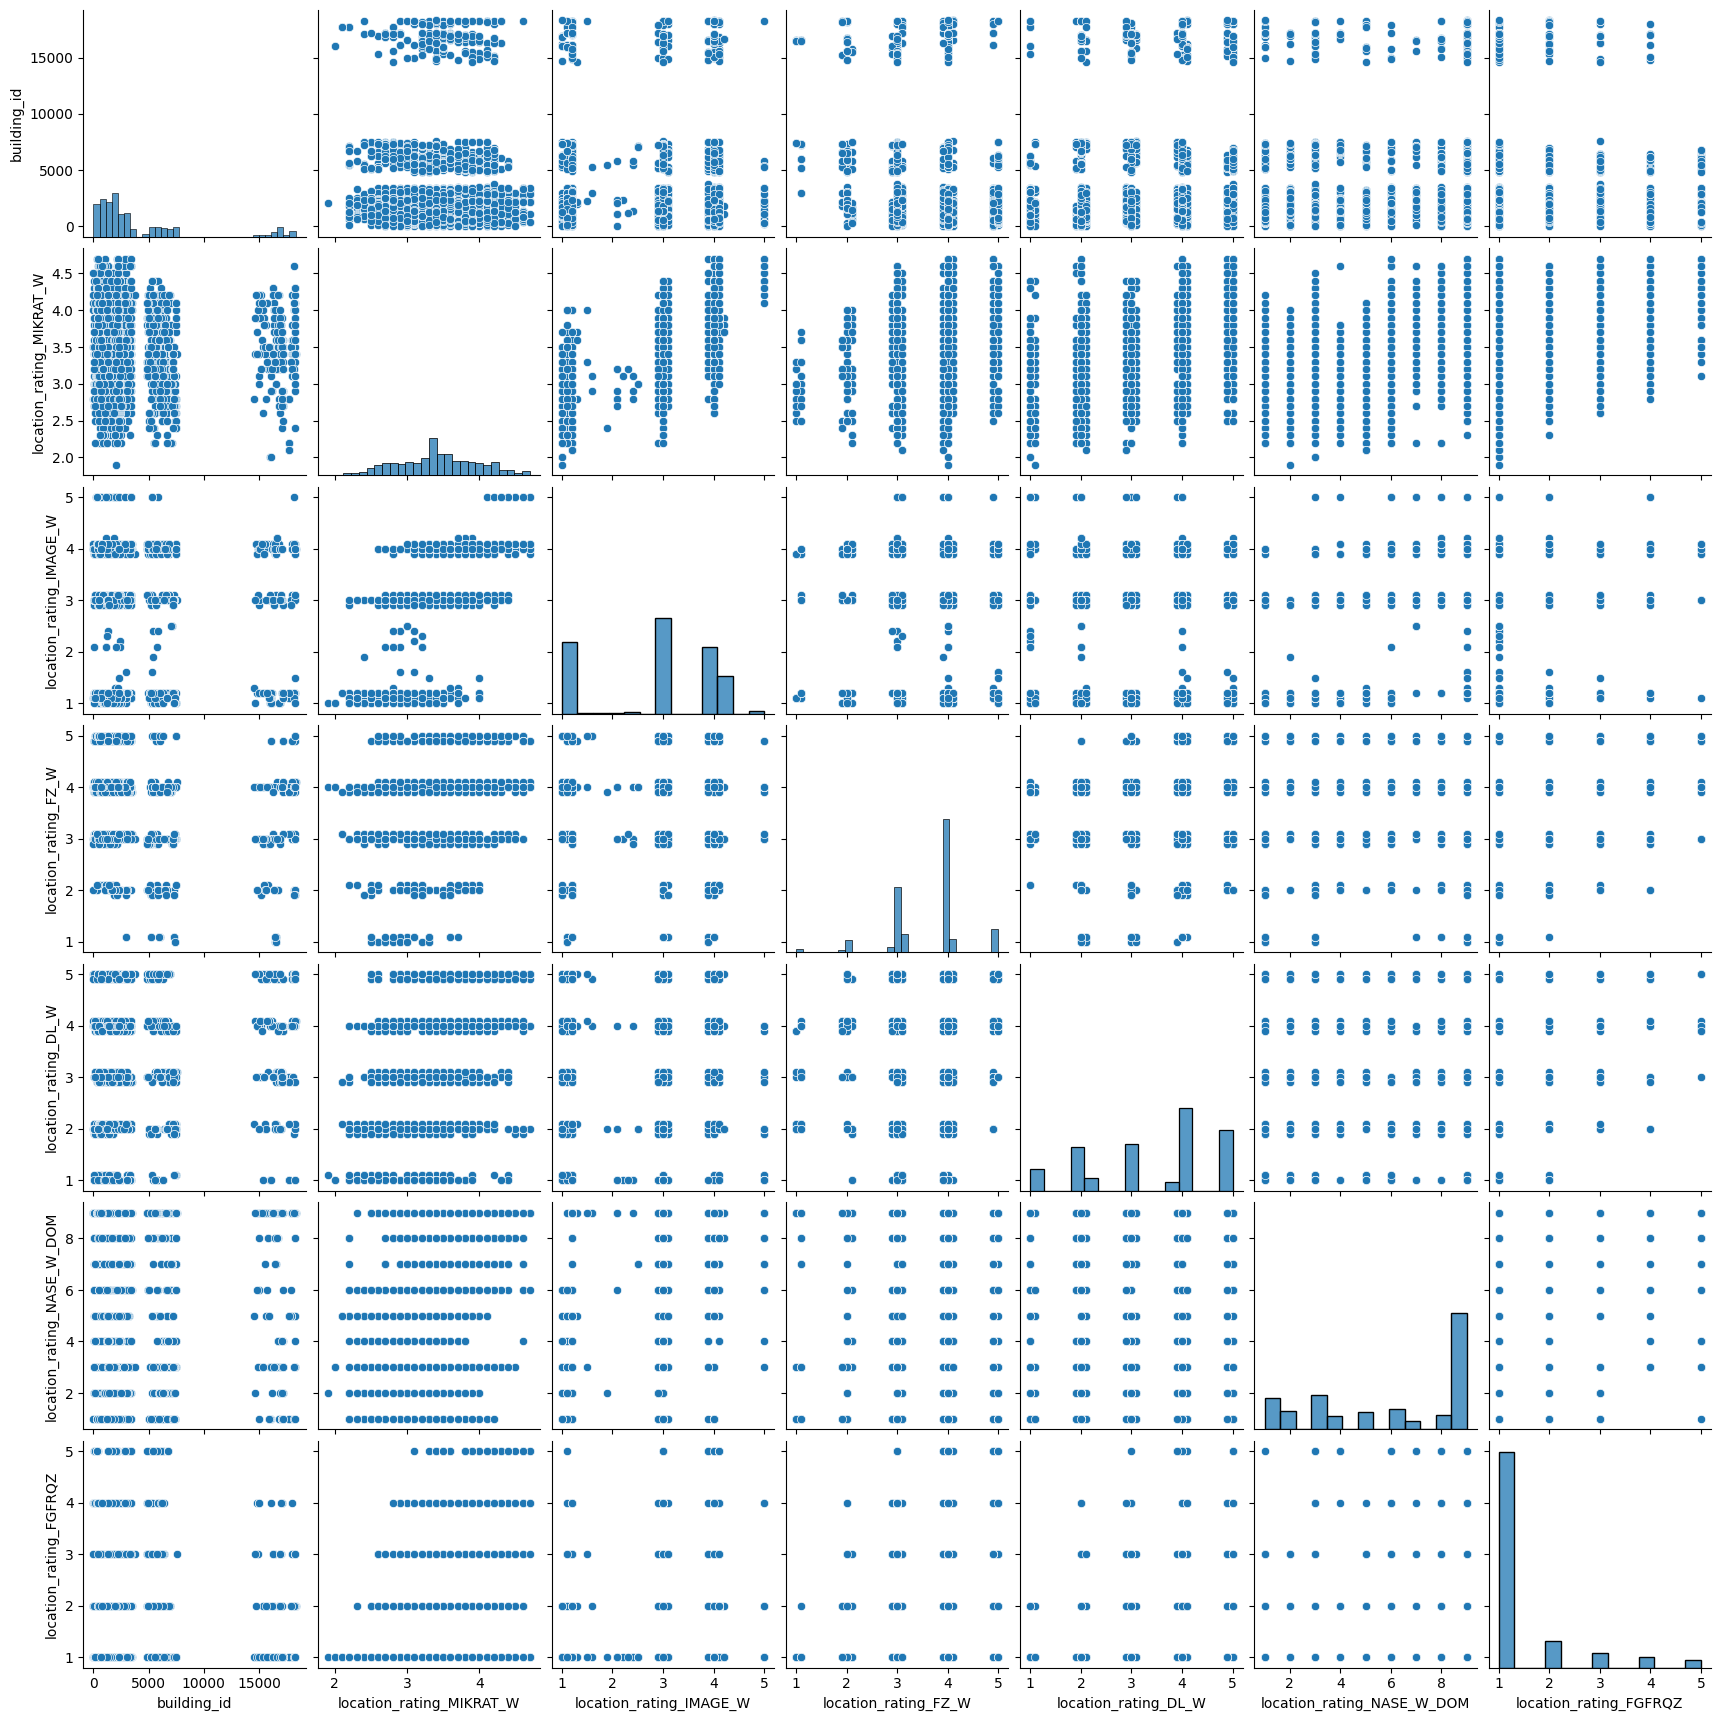

In [31]:
import seaborn as sns

# Построение матрицы графиков рассеивания
sns.pairplot(data)
plt.show()

In [26]:
'''
Высокая корреляция между:

location_rating_MIKRAT_W и location_rating_IMAGE_W (0.763184)
location_rating_IMAGE_W и location_rating_NASE_W_DOM (0.710778)
Возможна избыточность данных.

Умеренная корреляция:

Между несколькими парами параметров наблюдается умеренная положительная корреляция (значения от 0.3 до 0.6).
Эти переменные могут быть включены в модель, но следует проверить на наличие мультиколлинеарности.

Слабая или отсутствующая корреляция:

building_id не коррелирует с другими параметрами, что логично.
location_rating_FZ_W имеет очень слабую корреляцию с другими параметрами.
Параметры с низкой корреляцией могут предоставлять уникальную информацию и быть ценными для моделей.

Положительная корреляция:

Большинство корреляций положительные, что означает, что увеличение одного параметра связано с увеличением другого.
Это следует учитывать при интерпретации результатов и понимании взаимодействия между факторами.

Отрицательная корреляция:

Единственная заметная отрицательная корреляция наблюдается между building_id и location_rating_FZ_W (-0.179214), но она слабая.
Данная отрицательная корреляция может быть случайной или обусловлена структурой данных.
'''
